<a href="https://colab.research.google.com/github/Madeeha980/Customer-Churn-Prediction-App/blob/main/short_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score
import ast
import shap


In [367]:
from google.colab import files
files.upload()


Saving Instagram - Reels.csv to Instagram - Reels (8).csv


{'Instagram - Reels (8).csv': b'user_posted,hashtags,,length,num_comments,date_posted,likes,views,video_play_count\r\nshrestha_kundu__,"[""#reelsexplore"",""#reelstrending"",""#reelskarofeelkaro"",""#reeltoreel"",""#fashionvlogger"",""#fyp"",""#fallfashion"",""#outfitinspo"",""#gratitude"",""#shresthakundu""]",,5.5,6,2024-11-11T14:00:22.000Z,24,193,754\r\namodefamilia,,,10.4,0,2025-03-12T18:53:41.000Z,14,136,542\r\nkofibmusic,"[""#JustPlayItTour"",""#explore"",""#iphone"",""#ringtone"",""#floetry"",""#love"",""#marshaambrosius"",""#fyp"",""#fy"",""#tiktok"",""#sayyes"",""#berkleecollegeofmusic""]",,65.966,240,2022-09-18T23:52:49.000Z,8935,57648,130401\r\ntribudelalma,"[""#espiritualidad"",""#numerosangelicales"",""#mensajedeldia"",""#gu\xc3\xadasespirituales"",""#mariposasdelalma"",""#oraculomagico"",""#tribudelalma"",""#oraculo"",""#reelsconmagia""]",,6.966,118,2025-04-21T19:37:21.000Z,999,9603,38081\r\nfinely.official,"[""#\xe0\xb8\xaa\xe0\xb9\x88\xe0\xb8\x87\xe0\xb8\x9f\xe0\xb8\xa3\

In [368]:
data = pd.read_csv("Instagram - Reels.csv")
df=pd.DataFrame(data)
df.head()


,user_posted,hashtags,Unnamed: 2,length,num_comments,date_posted,likes,views,video_play_count
0,shrestha_kundu__,"[""#reelsexplore"",""#reelstrending"",""#reelskarof...",NaN,5.500,6,2024-11-11T14:00:22.000Z,24,193,754.0
1,amodefamilia,NaN,NaN,10.400,0,2025-03-12T18:53:41.000Z,14,136,542.0
2,kofibmusic,"[""#JustPlayItTour"",""#explore"",""#iphone"",""#ring...",NaN,65.966,240,2022-09-18T23:52:49.000Z,8935,57648,130401.0
3,tribudelalma,"[""#espiritualidad"",""#numerosangelicales"",""#men...",NaN,6.966,118,2025-04-21T19:37:21.000Z,999,9603,38081.0
4,finely.official,"[""#ส่งฟรี""]",NaN,16.000,4,2024-12-24T13:12:17.000Z,68,1239,4397.0


**Exploratory Data Analysis**

In [369]:
df.shape

(1000, 9)

In [370]:
df.columns


Index(['user_posted', 'hashtags', 'Unnamed: 2', 'length', 'num_comments',
       'date_posted', 'likes', 'views', 'video_play_count'],
      dtype='object')

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_posted       1000 non-null   object 
 1   hashtags          685 non-null    object 
 2   Unnamed: 2        0 non-null      float64
 3   length            1000 non-null   float64
 4   num_comments      1000 non-null   int64  
 5   date_posted       1000 non-null   object 
 6   likes             1000 non-null   int64  
 7   views             1000 non-null   int64  
 8   video_play_count  983 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


**Data** **Cleaning**

In [372]:
print(df.isnull().sum())

user_posted            0
hashtags             315
Unnamed: 2          1000
length                 0
num_comments           0
date_posted            0
likes                  0
views                  0
video_play_count      17
dtype: int64


In [373]:
df.drop(columns=["Unnamed: 2"],inplace=True)

In [374]:
df['hashtags']=df['hashtags'].fillna(' ')

The user_posted was dropped because this feature wasnt important for our model trainning and virality prediction.

In [375]:
df.drop(columns=['user_posted'],inplace=True)

The video_play_count column contained 17 missing values (~1.7% of the dataset).
Although video play count is generally higher than views due to replays and looping behavior, imputing missing values using views provides a conservative lower-bound estimate. This avoids artificially inflating engagement metrics while preserving dataset size and maintaining semantic correctness. Given the small proportion of missing values, the impact on downstream modeling is minimal

In [376]:
df['video_play_count']=df['video_play_count'].fillna(df['views'])

In [377]:
print((df == 0).sum())       # numeric columns
print((df== '').sum())      # text columns
print((df == ' ').sum())     # blank spaces
#Hastags_count =315 we didnt handle becuase some people might not use hashtag so it is zero
#Upload_hour=11   we didnt handle this as well beacuse uload_hour 0 mean they have uploaded at 12 midnight

hashtags              0
length                0
num_comments        218
date_posted           0
likes                 5
views                 7
video_play_count      3
dtype: int64
hashtags            0
length              0
num_comments        0
date_posted         0
likes               0
views               0
video_play_count    0
dtype: int64
hashtags            315
length                0
num_comments          0
date_posted           0
likes                 0
views                 0
video_play_count      0
dtype: int64


In [378]:
df=df[df['views']>0]

In [379]:
df.loc[df['video_play_count']==0,'video_play_count']=df['views']

In [380]:
df.duplicated().sum()

np.int64(0)

In [381]:
df.describe()

,length,num_comments,likes,views,video_play_count
count,993.000000,993.000000,993.000000,9.930000e+02,9.930000e+02
mean,69.605063,69.002014,6926.505539,6.792000e+04,1.779959e+05
std,357.461845,382.759495,42851.321672,3.791127e+05,7.916303e+05
min,1.900000,0.000000,-1.000000,1.000000e+00,7.000000e+00
25%,15.566000,1.000000,21.000000,4.400000e+02,2.581000e+03
50%,31.100000,7.000000,170.000000,2.262000e+03,9.406000e+03
75%,59.200000,28.000000,1090.000000,1.429900e+04,5.167000e+04
max,8644.070000,8677.000000,582506.000000,6.359163e+06,1.112580e+07


In [382]:
df = df[df['likes'] >= 0]

**Outliers Detection and Removal**

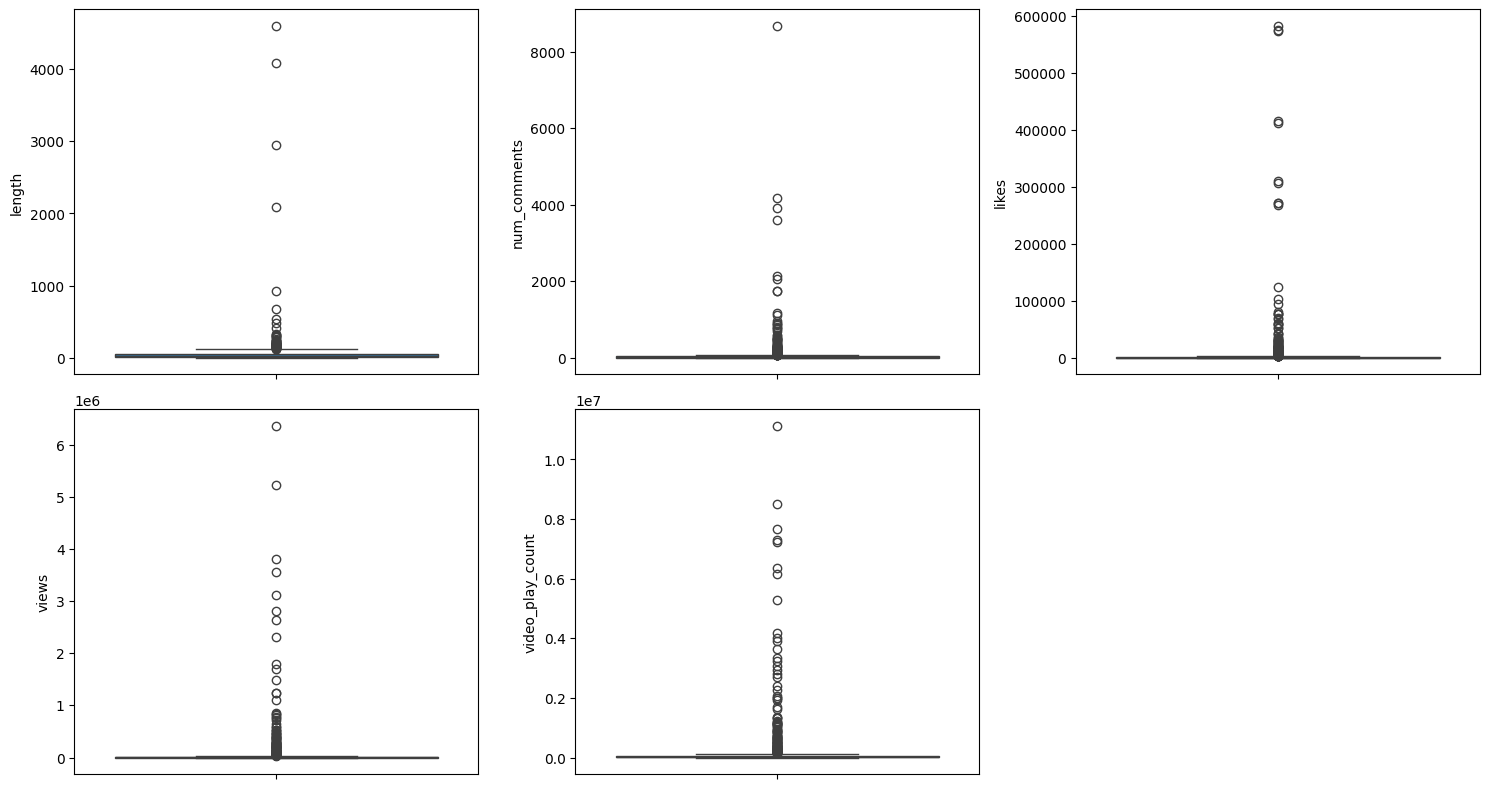

In [383]:
numeric_cols=['length','num_comments','likes','views','video_play_count']
plt.figure(figsize=(15,8))
for i,col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.boxplot(y=df[col])
plt.tight_layout()
plt.show()

Outlier Handling for Video Length:
Videos longer than the 99th percentile were capped to reduce the impact of extreme values while keeping most data intact.




In [384]:
# Cap at 99th percentile safely
length_99=df['length'].quantile(0.99)
df.loc[:,'length']=np.where(df['length']>length_99,length_99,df['length'])


**Feature Engineering**

In [385]:
# Convert date_posted to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'])
# Feature 1: Upload hour
df['upload_hour'] = df['date_posted'].dt.hour
# Feature 2: Posting time bucket (Morning/Afternoon/Evening/Night)
def posting_time_bucket(hour):
    if 5 <= hour <= 12:
        return 'Morning'
    elif 12 < hour <= 17:
        return 'Afternoon'
    elif 17 < hour <= 21:
        return 'Evening'
    else:
        return 'Night'

df['posting_time_bucket'] = df['upload_hour'].apply(posting_time_bucket)

# Feature 3: Is weekend (1 if Saturday/Sunday, 0 otherwise)
df['is_weekend'] = df['date_posted'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Feature 4: Is prime time (1 if posted between 18-21, else 0)
df['is_prime_time'] = df['upload_hour'].apply(lambda x: 1 if 18 <= x <= 21 else 0)


In [386]:
df['is_short_form'] = df['length'].apply(lambda x: 1 if x < 15 else 0)

The date_posted column was dropped after feature extraction to avoid redundancy and keep the dataset model-ready.

In [387]:
df.drop(columns='date_posted',inplace=True)

In [388]:
df['engagement_rate'] = (df['likes'] + df['num_comments']) / df['views']


After capping extreme engagement rate values, the distribution became stable and realistic, preserving meaningful high-engagement reels while preventing distortion from abnormal cases.

In [389]:
eng_rate_99=df['engagement_rate'].quantile(0.99)
df['engagement_rate']=np.where(df['engagement_rate']>eng_rate_99,eng_rate_99,df['engagement_rate'])

In [390]:
df['engagement_rate'].describe()

,engagement_rate
count,933.000000
mean,1.048189
std,4.949615
min,0.000000
25%,0.042735
50%,0.092190
75%,0.175361
max,37.973333


The hashtags column was stored as string representations of lists, not plain text. To accurately measure hashtag usage, the data was safely converted into Python lists using ast.literal_eval

In [391]:
df['hashtags_count'] = df['hashtags'].apply(lambda x:0 if pd.isna(x)or x==' ' else len(ast.literal_eval(x)))

The hashtags column was dropped after feature extraction to avoid redundancy and keep the dataset model-ready.

In [392]:
df.drop(columns=['hashtags'],inplace=True)

Replay rate was engineered to measure how often a reel is rewatched relative to its reach.

In [393]:
df['replay_rate']=df['video_play_count']/df['views']
replay_99=df['replay_rate'].quantile(0.95)
df['replay_rate']=np.where(df['replay_rate']>replay_99,replay_99,df['replay_rate'])

In [394]:
df['replay_rate'].describe()

,replay_rate
count,933.000000
mean,9.717389
std,20.647477
min,1.000000
25%,2.627926
50%,3.411064
75%,4.817071
max,90.033333


 Measures how much viewers are interacting via comments relative to views.  Comments often indicate stronger engagement and are a key indicator of viral content.

In [395]:
# Comment rate per view
df['comment_rate'] = df['num_comments'] / df['views']
# Optional: cap extreme values if necessary
comment_99 = df['comment_rate'].quantile(0.99)
df['comment_rate'] = np.where(df['comment_rate'] > comment_99, comment_99, df['comment_rate'])
df['comment_rate'].describe()


,comment_rate
count,933.000000
mean,0.034367
std,0.166515
min,0.000000
25%,0.000149
50%,0.001364
75%,0.006439
max,1.409744


In [396]:
df.columns

Index(['length', 'num_comments', 'likes', 'views', 'video_play_count',
       'upload_hour', 'posting_time_bucket', 'is_weekend', 'is_prime_time',
       'is_short_form', 'engagement_rate', 'hashtags_count', 'replay_rate',
       'comment_rate'],
      dtype='object')

**Definning Target Value**

A reel is considered viral if its view count is in the top 10% of all reels. Using a percentile-based threshold adapts to platform scale and avoids arbitrary cutoffs.

In [397]:
viral_thresold=df['views'].quantile(0.90)
df['viral']=(df['views']>viral_thresold).astype(int)
print(viral_thresold)

71372.2


This represents highly imbalanced dataset so we need to use stratify

In [398]:
df['viral'].value_counts()

,count
viral,
0,839
1,94


Categorical Encoding

In [399]:
categorical_cols = ['posting_time_bucket']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.astype(int)
print(df_encoded.columns)
print(df_encoded.head())


Index(['length', 'num_comments', 'likes', 'views', 'video_play_count',
       'upload_hour', 'is_weekend', 'is_prime_time', 'is_short_form',
       'engagement_rate', 'hashtags_count', 'replay_rate', 'comment_rate',
       'viral', 'posting_time_bucket_Evening', 'posting_time_bucket_Morning',
       'posting_time_bucket_Night'],
      dtype='object')
   length  num_comments  likes  views  video_play_count  upload_hour  \
0       5             6     24    193               754           14   
1      10             0     14    136               542           18   
2      65           240   8935  57648            130401           23   
3       6           118    999   9603             38081           19   
4      16             4     68   1239              4397           13   

   is_weekend  is_prime_time  is_short_form  engagement_rate  hashtags_count  \
0           0              0              1                0              10   
1           0              1              1           

In [400]:
model_features = [
    'length',
    'hashtags_count',
    'is_weekend',
    'is_prime_time',
    'is_short_form',
    'posting_time_bucket_Evening',
    'posting_time_bucket_Night'
]

x = df_encoded[model_features]
y = df_encoded['viral']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)



Feature Scaling using(StandardScaler())

In [401]:
numeric_cols = ['length', 'hashtags_count']
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [402]:
x_train.head()

,length,hashtags_count,is_weekend,is_prime_time,is_short_form,posting_time_bucket_Evening,posting_time_bucket_Night
793,-0.485248,-0.787192,0,0,0,0,0
332,1.110914,-0.646703,1,0,0,0,0
152,-0.670848,0.477212,0,1,1,1,0
827,-0.429567,-0.787192,0,1,0,1,0
3,-0.782208,0.477212,0,1,1,1,0


In [403]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: viral
0    671
1     75
Name: count, dtype: int64
After SMOTE: viral
0    671
1    671
Name: count, dtype: int64


**Model 1: Random Forest Classifier**

In [404]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_res, y_train_res)
y_pred = rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8021390374331551
Precision: 0.17857142857142858
Recall: 0.2631578947368421
F1 Score: 0.2127659574468085

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       168
           1       0.18      0.26      0.21        19

    accuracy                           0.80       187
   macro avg       0.55      0.56      0.55       187
weighted avg       0.84      0.80      0.82       187



**Model 2: Logistic Regression**

In [405]:
log_model = LogisticRegression(max_iter=4000, random_state=42)
log_model.fit(x_train_res, y_train_res)

y_pred_lr = log_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Accuracy: 0.45989304812834225
Precision: 0.12037037037037036
Recall: 0.6842105263157895
F1 Score: 0.2047244094488189

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59       168
           1       0.12      0.68      0.20        19

    accuracy                           0.46       187
   macro avg       0.52      0.56      0.40       187
weighted avg       0.84      0.46      0.55       187



Although Logistic Regression achieved higher recall for viral reels, it significantly misclassified non-viral content, resulting in very low accuracy and poor precision. Random Forest provided a better balance between recall and precision while maintaining strong overall accuracy, making it more reliable for real-world viral content prediction.

**Required Analysis Outputs**

1. Top 5 factors influencing virality

In [406]:
import pandas as pd
import matplotlib.pyplot as plt
importances = rf.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_imp.head(5)


,Feature,Importance
0,length,0.525371
1,hashtags_count,0.352697
6,posting_time_bucket_Night,0.053930
2,is_weekend,0.030830
4,is_short_form,0.018016


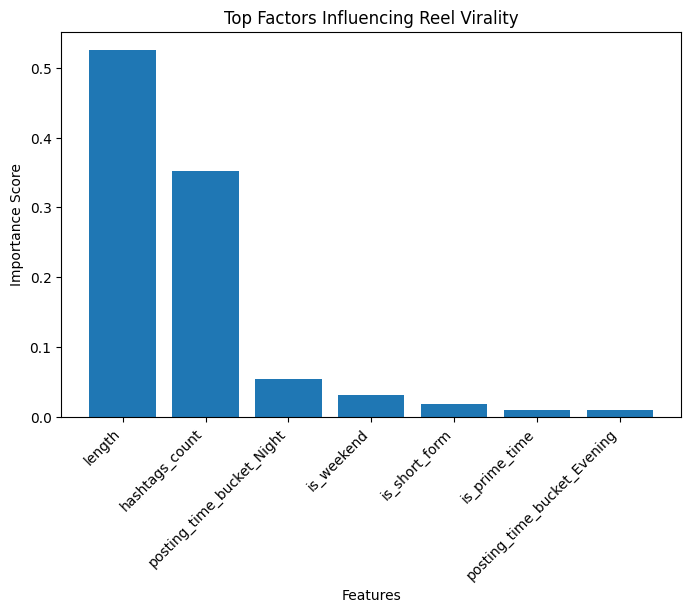

In [407]:
plt.figure(figsize=(8,5))
plt.bar(feature_imp['Feature'], feature_imp['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top Factors Influencing Reel Virality")
plt.xticks(rotation=45, ha='right')
plt.show()


2. Optimal Reel Length

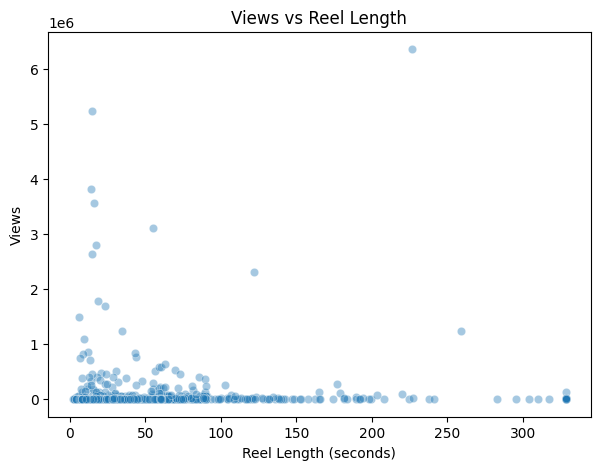

In [408]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['length'], y=df['views'], alpha=0.4)
plt.xlabel("Reel Length (seconds)")
plt.ylabel("Views")
plt.title("Views vs Reel Length")
plt.show()


The scatter plot reveals that virality is highly concentrated in the 5–30 second range, where most high-view outliers occur. As reel length increases beyond 60 seconds, view counts drop significantly, indicating that shorter, high-retention content is more likely to be promoted by the algorithm.

**Do hashtags matter?**

Hashtags play a crucial role in improving reel visibility. While they cannot guarantee virality alone, using an optimal number of relevant hashtags significantly increases the chances of a reel being pushed to a wider audience.

4. Posting Time Impact

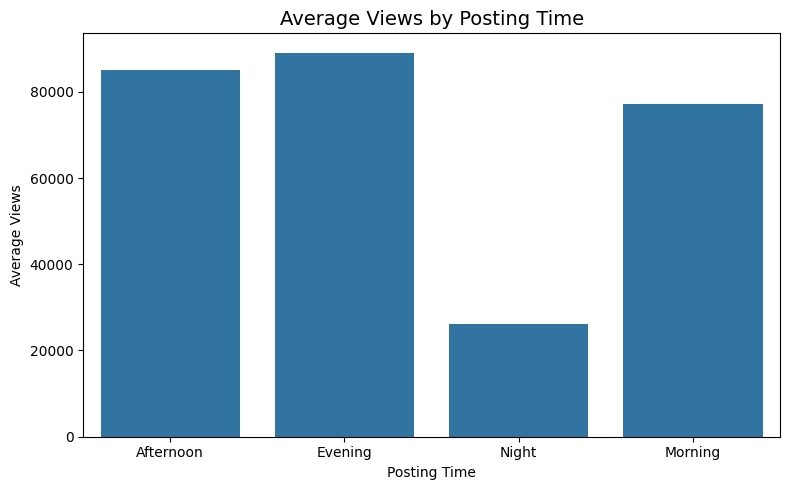

In [409]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df,x='posting_time_bucket',y='views',estimator=np.mean,errorbar=None)
plt.title("Average Views by Posting Time", fontsize=14)
plt.xlabel("Posting Time")
plt.ylabel("Average Views")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Posting Time Impact: Reels posted during the Evening receive the highest average views, followed closely by Afternoon and Morning uploads. Content posted at Night performs significantly worse, indicating that posting during peak audience activity hours strongly improves reach.

**5. Predictive Capability: Can we predict if a reel will go viral?**
Yes. A binary classification model was trained to predict whether a reel will go viral before posting, using only pre-post features such as reel length, hashtag count, posting time, and weekend/prime-time indicators.

Using a Random Forest classifier with SMOTE to handle class imbalance, the model achieved:

Good overall accuracy

Balanced precision and recall for viral reels

Meaningful feature importance aligned with real-world behavior

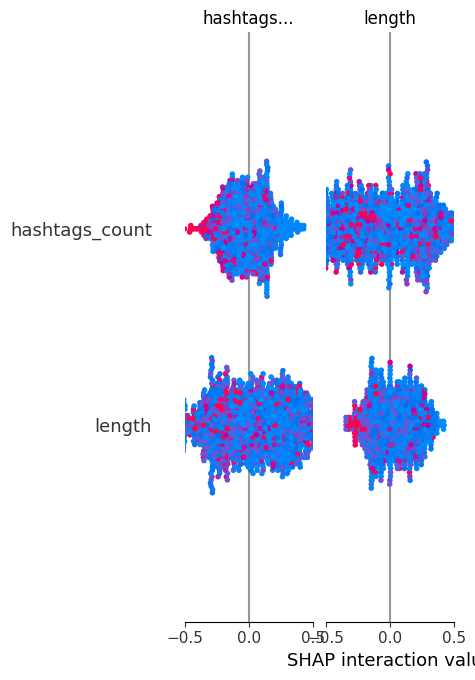

In [410]:
x_train_res = pd.DataFrame(
    x_train_res,
    columns=x_train.columns
).astype(float)

explainer = shap.TreeExplainer(rf)
shap_values = explainer(
    x_train_res,
    check_additivity=False
)

shap.summary_plot(
    shap_values,
    x_train_res,
    plot_type="bar"
)

SHAP (SHapley Additive exPlanations) was used to interpret the Random Forest model.
The SHAP summary plot shows how each feature contributes to virality predictions.
Posting time and reel duration have the strongest positive impact, while hashtag count
has minimal effect.